# Initial Data Exploration Adult Exercise equipment and their locations within Philadelphia
* https://www.opendataphilly.org/dataset/ppr-adult-exercise-equipment
* ### Public Adult Exercise Equipment
This data set shows the locations of adult exercise equipment located within or are maintained by Philadelphia Parks and Recreation (PPR). Public exercise equipment offers many benefits ranging from physical to social gains that improve overall health internally and externally. 

* #### Here are some of the benefits to Outdoor Exercise
    - It is a natural antidepressant. 
    - It challenges your body. 
    - It provides mental relief. 
    - You can turn it into a social outing.
    - It’s free. 
    - It can be a team-building experience. 

## Displays the locations of adult exercise equipment located within or are maintained by Philadelphia Parks and Recreation (PPR).


### Data
   * A GEOJson file

In [14]:
import pandas as pd
import geopandas as gpd

In [15]:
ee_gpf = gpd.read_file('../data/ppr_adult_exercise_equipment.geojson.json')

In [17]:
ee_gpf.shape

(27, 6)

There are 27 rows and 6 columns in this data set

In [18]:
ee_gpf.columns

Index(['objectid', 'park_name', 'date_installed', 'comments', 'data_source',
       'geometry'],
      dtype='object')

I chose to explore the "geometry" of the public exercise equipment because I was interested in how the location of public equipment relates to or is similar to that of food access.

In [19]:
ee_gpf['geometry']

0     POINT (-75.05415 40.01851)
1     POINT (-75.20780 40.00164)
2     POINT (-75.12333 39.99452)
3     POINT (-75.16018 40.03228)
4     POINT (-75.11786 39.98170)
5     POINT (-75.20104 39.99065)
6     POINT (-75.20147 39.99030)
7     POINT (-75.19976 39.99155)
8     POINT (-75.19594 39.99521)
9     POINT (-75.19472 39.99667)
10    POINT (-75.20868 40.00168)
11    POINT (-75.14548 40.02034)
12    POINT (-75.19349 39.93296)
13    POINT (-75.19367 39.93341)
14    POINT (-75.19425 39.93337)
15    POINT (-75.15253 40.02397)
16    POINT (-75.23740 39.97061)
17    POINT (-75.23608 39.97156)
18    POINT (-75.04406 40.02870)
19    POINT (-75.15061 39.92137)
20    POINT (-75.06236 40.01626)
21    POINT (-75.18764 39.92612)
22    POINT (-75.18853 40.05784)
23    POINT (-75.23223 39.98343)
24    POINT (-75.23173 39.98325)
25    POINT (-75.23422 39.96663)
26    POINT (-75.23435 39.96605)
Name: geometry, dtype: geometry

In [20]:
ee_gpf.head()

,objectid,park_name,date_installed,comments,data_source,geometry
0,1,American Legion Playground,2016-01-01T00:00:00,None,"Capital Data 2019, Google Street View 2018, Pi...",POINT (-75.05415 40.01851)
1,2,Woodside Park,2010-01-01T00:00:00,East side of park,"Capital Data 2019, Google Street View 2018, Pi...",POINT (-75.20780 40.00164)
2,3,Marian Winfield Hissey Recreation Center,2016-01-01T00:00:00,None,"Capital Data 2019, Google Street View 2018, Pi...",POINT (-75.12333 39.99452)
3,4,Wister Playground,2016-01-01T00:00:00,None,"Capital Data 2019, Google Street View 2018, Pi...",POINT (-75.16018 40.03228)
4,5,Frederick Cione Playground,2016-01-01T00:00:00,None,"Capital Data 2019, Google Street View 2018, Pi...",POINT (-75.11786 39.98170)


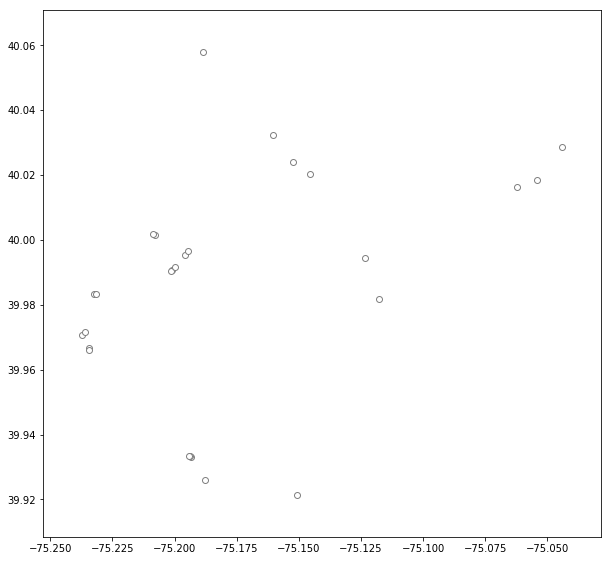

In [22]:
ee_gpf.plot(figsize=(10,10), color='white', edgecolor='gray')

The plot above is difficult to read and analyze because there is no context or comparison. The best way to read this data would be to look at it in conjunction with a map of Philadelphia or next to the inequality factors and draw conclusions about the difference in access in varying districts of Philadelphia.

In [29]:
ex_eqip_gdf = gpd.read_file('../data/ppr_adult_exercise_equipment.geojson.json')

In [30]:
ex_eqip_gdf['label']="Public Exercise Equipment"

In [32]:
ex_eqip_gdf.columns

Index(['objectid', 'park_name', 'date_installed', 'comments', 'data_source',
       'geometry', 'label'],
      dtype='object')

In [34]:
base_zip_gdf = gpd.read_file('../data/Zipcodes_Poly.geojson')
base_ward_gdf = gpd.read_file('../data/Political_Divisions.geojson')

I installed a base-map of Philadelphia Zip-code divisions to see more context

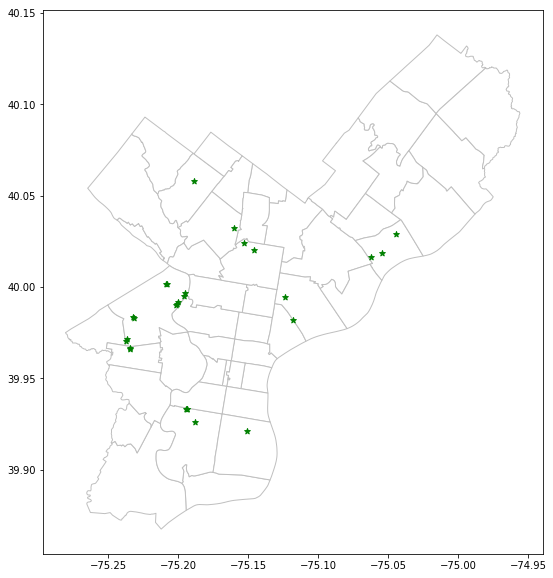

In [36]:
base=base_zip_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))

ex_eqip_gdf.plot(ax=base, color='green', marker='*')

I would like to create a map with the locations of the parks with exercise equipment a different color (heat map) and then compare that to my map of food access

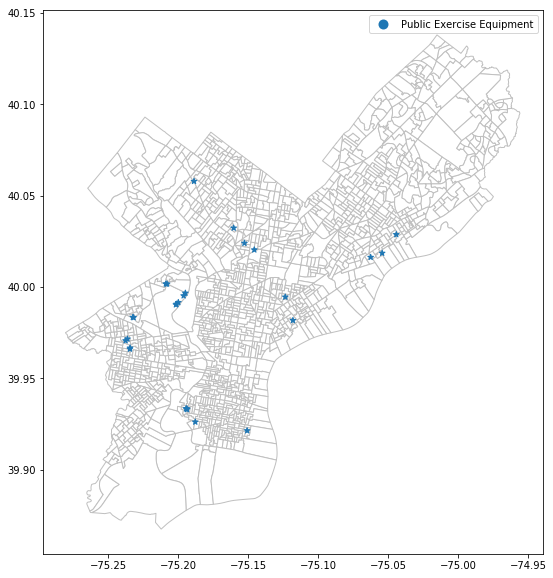

In [37]:
base=base_ward_gdf.plot(color='white', edgecolor='#c0c0c0', figsize=(10,10))
ex_eqip_gdf.plot(ax=base, marker='*', column='label', 
                 categorical=True, legend=True)

I decided that the clearest way for me and readers to understand the locations and accessibility of public exercise equipment was to plot it on this map of Philadelphia denoting the location of equipment with a blue star and plotting the column "label". These geolocations are plotted over a mapping of Philadelphia blocks.

 * Public Exercise Equipment
      >The public exercise equipment, noted by the light blue star, is spread out and located nearby parks and 
      recreational centers which allow for the equipment. I noticed that in the NorthEastern area of Philadelphia,
      furthest from the city center there aren't just less public exercise locations but non whatsoever. There is 
      an association with lighter grays (lower accessibility score) and Northwestern Philadelphia.